# Demo 1: a demo based on visual-92-categories-task MEG data

Here is a demo based on the publicly available visual-92-categories-task MEG datasets. (Reference: Cichy, R. M., Pantazis, D., & Oliva, A. “Resolving human object recognition in space and time.” Nature neuroscience (2014): 17(3), 455-462.) MNE-Python has been used to load this dataset.

In [1]:
# -*- coding: utf-8 -*-

' a demo based on visual-92-categories-task MEG data '
# Users can learn how to use Neurora to do research based on EEG/MEG etc data.

__author__ = 'Zitong Lu'

import numpy as np
import os.path as op
from pandas import read_csv
import mne
from mne.io import read_raw_fif
from mne.datasets import visual_92_categories
from neurora.nps_cal import nps
from neurora.rdm_cal import eegRDM
from neurora.rdm_corr import rdm_correlation_spearman
from neurora.corr_cal_by_rdm import rdms_corr
from neurora.rsa_plot import plot_rdm, plot_corrs_by_time, plot_nps_hotmap, plot_corrs_hotmap

## Section 1: loading example data
Here, we use MNE-Python toolbox for loading data and processing. You can learn this process from MNE-Python (https://mne-tools.github.io/stable/index.html).

In [2]:
data_path = visual_92_categories.data_path()
fname = op.join(data_path, 'visual_stimuli.csv')
conds = read_csv(fname)
conditions = []
for c in conds.values:
    cond_tags = list(c[:2])
    cond_tags += [('not-' if i == 0 else '') + conds.columns[k]
                  for k, i in enumerate(c[2:], 2)]
    conditions.append('/'.join(map(str, cond_tags)))
event_id = dict(zip(conditions, conds.trigger + 1))
print(event_id)
sub_id = [0, 1, 2]
megdata = np.zeros([3, 92, 306, 1101], dtype=np.float32)
subindex = 0
for id in sub_id:
    fname = op.join(data_path, 'sample_subject_'+str(id)+'_tsss_mc.fif')
    raw = read_raw_fif(fname)
    events = mne.find_events(raw, min_duration=.002)
    events = events[events[:, 2] <= 92]
    subdata = np.zeros([92, 306, 1101], dtype=np.float32)
    for i in range(92):
        epochs = mne.Epochs(raw, events=events, event_id=i + 1, baseline=None,
                            tmin=-0.1, tmax=1, preload=True)
        data = epochs.average().data
        subdata[i] = data
    megdata[subindex] = subdata
    subindex = subindex + 1

# the shape of MEG data: megdata is [3, 92, 306, 1101]
# n_subs = 3, n_conditions = 92, n_channels = 306, n_timepoints = 1101 (-100ms to 1000ms)

{'0/human bodypart/human/not-face/animal/natural': 1, '1/human bodypart/human/not-face/animal/natural': 2, '2/human bodypart/human/not-face/animal/natural': 3, '3/human bodypart/human/not-face/animal/natural': 4, '4/human bodypart/human/not-face/animal/natural': 5, '5/human bodypart/human/not-face/animal/natural': 6, '6/human bodypart/human/not-face/animal/natural': 7, '7/human bodypart/human/not-face/animal/natural': 8, '8/human bodypart/human/not-face/animal/natural': 9, '9/human bodypart/human/not-face/animal/natural': 10, '10/human bodypart/human/not-face/animal/natural': 11, '11/human bodypart/human/not-face/animal/natural': 12, '12/human face/human/face/animal/natural': 13, '13/human face/human/face/animal/natural': 14, '14/human face/human/face/animal/natural': 15, '15/human face/human/face/animal/natural': 16, '16/human face/human/face/animal/natural': 17, '17/human face/human/face/animal/natural': 18, '18/human face/human/face/animal/natural': 19, '19/human face/human/face/ani

<ipython-input-2-5375e93cc7e7>:17: RuntimeWarning: This filename (/Users/zitonglu/mne_data/MNE-visual_92_categories-data/sample_subject_0_tsss_mc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  raw = read_raw_fif(fname)
/Users/zitonglu/anaconda3/lib/python3.7/site-packages/mne/io/tag.py:348: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  return str(d.tostring().decode('latin1', 'ignore'))
/Users/zitonglu/anaconda3/lib/python3.7/site-packages/mne/io/tag.py:348: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  return str(d.tostring().decode('latin1', 'ignore'))
/Users/zitonglu/anaconda3/lib/python3.7/site-packages/mne/io/tag.py:348: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  return str(d.tostring().decode('latin1', 'ignore'))
/Users/zitonglu/anaconda3/lib/python3.7/site-packages/mne/io/tag.py

1374 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93 200 222 244]
10 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 10 events and 1101 original time points ...
0 bad epochs dropped
10 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 10 events and 1101 original time points ...
0 bad epochs dropped
10 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 10 events and 1101 original time points ...
0 bad epochs dropped
10 matching even

0 projection items activated
Loading data for 10 events and 1101 original time points ...
0 bad epochs dropped
10 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 10 events and 1101 original time points ...
0 bad epochs dropped
10 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 10 events and 1101 original time points ...
0 bad epochs dropped
10 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 10 events and 1101 original time points ...
0 bad epochs dropped
10 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 10 events and 1101 original time points ...
0 bad epochs dropped
10 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 10 events and 

10 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 10 events and 1101 original time points ...
0 bad epochs dropped
10 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 10 events and 1101 original time points ...
0 bad epochs dropped
10 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 10 events and 1101 original time points ...
0 bad epochs dropped
10 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 10 events and 1101 original time points ...
0 bad epochs dropped
10 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 10 events and 1101 original time points ...
0 bad epochs dropped
10 matching events found
No baseline correction applied
Not 

<ipython-input-2-5375e93cc7e7>:17: RuntimeWarning: This filename (/Users/zitonglu/mne_data/MNE-visual_92_categories-data/sample_subject_1_tsss_mc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  raw = read_raw_fif(fname)
/Users/zitonglu/anaconda3/lib/python3.7/site-packages/mne/io/tag.py:348: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  return str(d.tostring().decode('latin1', 'ignore'))
/Users/zitonglu/anaconda3/lib/python3.7/site-packages/mne/io/tag.py:348: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  return str(d.tostring().decode('latin1', 'ignore'))
/Users/zitonglu/anaconda3/lib/python3.7/site-packages/mne/io/tag.py:348: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  return str(d.tostring().decode('latin1', 'ignore'))
/Users/zitonglu/anaconda3/lib/python3.7/site-packages/mne/io/tag.py

    Range : 1651000 ... 3242999 =   1651.000 ...  3242.999 secs
Ready.
Current compensation grade : 0


/Users/zitonglu/anaconda3/lib/python3.7/site-packages/mne/io/tag.py:427: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  ch_name = ch_name[:np.argmax(ch_name == b'')].tostring()
/Users/zitonglu/anaconda3/lib/python3.7/site-packages/mne/io/tag.py:427: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  ch_name = ch_name[:np.argmax(ch_name == b'')].tostring()
/Users/zitonglu/anaconda3/lib/python3.7/site-packages/mne/io/tag.py:427: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  ch_name = ch_name[:np.argmax(ch_name == b'')].tostring()
/Users/zitonglu/anaconda3/lib/python3.7/site-packages/mne/io/tag.py:427: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  ch_name = ch_name[:np.argmax(ch_name == b'')].tostring()
/Users/zitonglu/anaconda3/lib/python3.7/site-packages/mne/io/tag.py:427: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  ch_name = ch_name[:np.argmax(ch_name == b'')].tostri

1356 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93 200 222 244]
9 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 9 events and 1101 original time points ...
0 bad epochs dropped
10 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 10 events and 1101 original time points ...
0 bad epochs dropped
10 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 10 events and 1101 original time points ...
0 bad epochs dropped
10 matching events

0 projection items activated
Loading data for 10 events and 1101 original time points ...
0 bad epochs dropped
9 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 9 events and 1101 original time points ...
0 bad epochs dropped
10 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 10 events and 1101 original time points ...
0 bad epochs dropped
10 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 10 events and 1101 original time points ...
0 bad epochs dropped
9 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 9 events and 1101 original time points ...
0 bad epochs dropped
10 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 10 events and 1101

No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 8 events and 1101 original time points ...
0 bad epochs dropped
9 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 9 events and 1101 original time points ...
0 bad epochs dropped
9 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 9 events and 1101 original time points ...
0 bad epochs dropped
10 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 10 events and 1101 original time points ...
0 bad epochs dropped
10 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 10 events and 1101 original time points ...
0 bad epochs dropped
10 matching events found
No baseline correction applied
Not setting metadata
0 projection 

<ipython-input-2-5375e93cc7e7>:17: RuntimeWarning: This filename (/Users/zitonglu/mne_data/MNE-visual_92_categories-data/sample_subject_2_tsss_mc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  raw = read_raw_fif(fname)
/Users/zitonglu/anaconda3/lib/python3.7/site-packages/mne/io/tag.py:348: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  return str(d.tostring().decode('latin1', 'ignore'))
/Users/zitonglu/anaconda3/lib/python3.7/site-packages/mne/io/tag.py:348: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  return str(d.tostring().decode('latin1', 'ignore'))
/Users/zitonglu/anaconda3/lib/python3.7/site-packages/mne/io/tag.py:348: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  return str(d.tostring().decode('latin1', 'ignore'))
/Users/zitonglu/anaconda3/lib/python3.7/site-packages/mne/io/tag.py

Trigger channel has a non-zero initial value of 28 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
1294 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93 200 222 244]
10 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 10 events and 1101 original time points ...
0 bad epochs dropped
10 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 10 events and 1101 original time points ...
0 bad epochs dropped
8 matching events found
No baseline corre

0 bad epochs dropped
10 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 10 events and 1101 original time points ...
0 bad epochs dropped
9 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 9 events and 1101 original time points ...
0 bad epochs dropped
9 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 9 events and 1101 original time points ...
0 bad epochs dropped
9 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 9 events and 1101 original time points ...
0 bad epochs dropped
11 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 11 events and 1101 original time points ...
0 bad epochs dropped
10 matching events found
No baseline correcti

0 bad epochs dropped
11 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 11 events and 1101 original time points ...
0 bad epochs dropped
10 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 10 events and 1101 original time points ...
0 bad epochs dropped
10 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 10 events and 1101 original time points ...
0 bad epochs dropped
9 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 9 events and 1101 original time points ...
0 bad epochs dropped
9 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 9 events and 1101 original time points ...
0 bad epochs dropped
9 matching events found
No baseline correct

## Section 2: Preprocessing

In [3]:
# shape of megdata: [n_subs, n_cons, n_chls, n_ts] -> [n_cons, n_subs, n_chls, n_ts]
megdata = np.transpose(megdata, (1, 0, 2, 3))

# shape of megdata: [n_cons, n_subs, n_chls, n_ts] -> [n_cons, n_subs, n_trials, n_chls, n_ts]
# here data is averaged, so set n_trials = 1
megdata = np.reshape(megdata, [92, 3, 1, 306, 1101])

## Section 3: Calculating the neural pattern similarity

0 0.01 1.0
(5, 100)


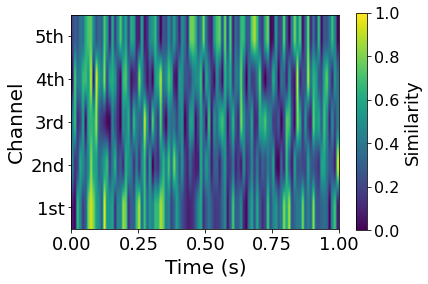

0 0.01 1.0
(5, 5000)


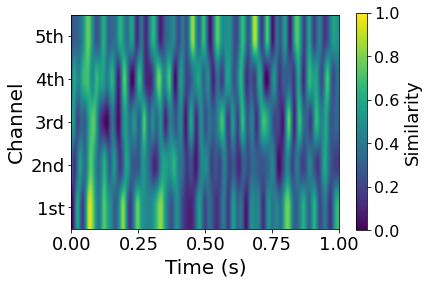

In [4]:
# Get data under different condition
# Here we calculate the neural pattern similarity (NPS) between two stimulus
# Seeing Humanface vs. Seeing Non-Humanface

# get data under "humanface" condtion
megdata_humanface = megdata[12:24]
# get data under "nonhumanface" condition
megdata_nonhumanface = megdata[36:48]

# Average the data
avg_megdata_humanface = np.average(megdata_humanface, axis=0)
avg_megdata_nonhumanface = np.average(megdata_nonhumanface, axis=0)

# Create NPS input data
# Here we extract the data from first 5 channels between 0ms and 1000ms
nps_data = np.zeros([2, 3, 1, 5, 1000]) # n_cons=2, n_subs=3, n_chls=5, n_ts=1000
nps_data[0] = avg_megdata_humanface[:, :, :5, 100:1100] # the start time of the data is -100ms
nps_data[1] = avg_megdata_nonhumanface[:, :, :5, 100:1100] # so 100:1200 corresponds 0ms-1000ms

# Calculate the NPS with a 10ms time-window
# (raw sampling requency is 1000Hz, so here time_win=10ms/(1s/1000Hz)/1000=10)
nps = nps(nps_data, time_win=10, time_step=10)

# Plot the NPS results
plot_nps_hotmap(nps[:, :, 0], time_unit=[0, 0.01], abs=True)

# Smooth the results and plot
plot_nps_hotmap(nps[:, :, 0], time_unit=[0, 0.01], abs=True, smooth=True)

## Section 4: Calculating single RDM and Plotting

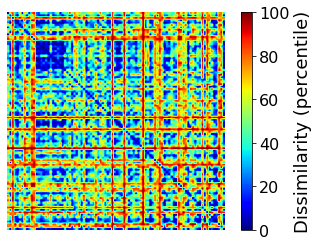

In [5]:
# Calculate the RDM based on the data during 190ms-210ms
rdm = eegRDM(megdata[:, :, :, :, 290:310])

# Plot this RDM
plot_rdm(rdm, percentile=True)

## Section 5: Calculating RDMs and Plotting

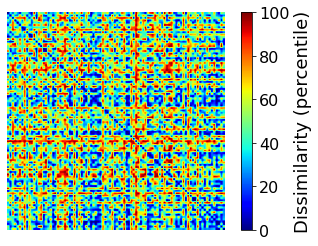

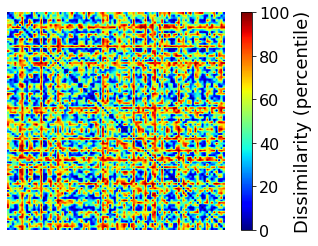

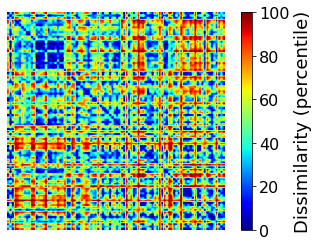

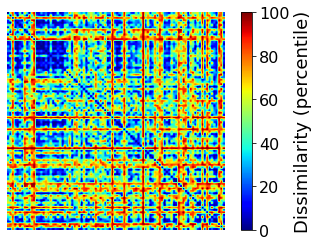

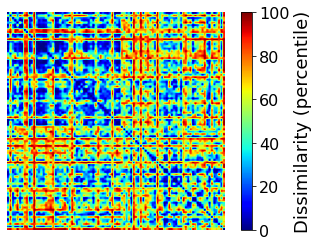

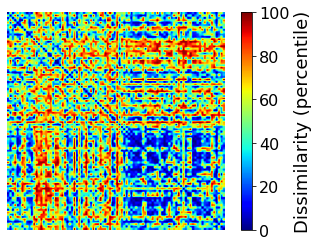

In [6]:
# Calculate the RDMs by a 10ms time-window
# (raw sampling requency is 1000Hz, so here time_win=10ms/(1s/1000Hz)/1000=10)
rdms = eegRDM(megdata, time_opt=1, time_win=10, time_step=10)

# Plot the RDM of -100ms, 0ms, 50ms, 100ms, 150ms, 200ms
times = [0, 10, 20, 30, 40, 50]
for t in times:
    plot_rdm(rdms[t], percentile=True)

## Section 6: Calculating the Similarity between two RDMs

In [7]:
# RDM of 200ms
rdm_sample1 = rdms[30]
# RDM of 800ms
rdm_sample2 = rdms[90]

# calculate the correlation coefficient between these two RDMs
corr = rdm_correlation_spearman(rdm_sample1, rdm_sample2)
print(corr)

92
(92, 92)
(92, 92)
[65.169613   87.36263736 13.92737697 ... 97.15719064 20.21022456
 82.99092212]
[0.46178379 0.76215487 0.67578163 ... 0.66628749 0.6135494  0.65421626]
[0.0209557  0.17523819]


## Section 7: Calculating the Similarity and Plotting

92
(92, 92)
(92, 92)
[65.169613   87.36263736 13.92737697 ... 97.15719064 20.21022456
 82.99092212]
[39.05876732 20.73578595 48.92498806 ... 57.07118968  2.03057812
 56.3784042 ]
92
(92, 92)
(92, 92)
[65.169613   87.36263736 13.92737697 ... 97.15719064 20.21022456
 82.99092212]
[0.70961774 0.54329056 0.81251065 ... 0.67630148 0.63111673 0.80332936]
92
(92, 92)
(92, 92)
[65.169613   87.36263736 13.92737697 ... 97.15719064 20.21022456
 82.99092212]
[0.90561503 0.65042561 0.83192035 ... 0.61822283 0.90000301 0.78989218]
92
(92, 92)
(92, 92)
[65.169613   87.36263736 13.92737697 ... 97.15719064 20.21022456
 82.99092212]
[0.81030459 0.67445666 0.72123016 ... 0.80866552 0.8209795  0.55738085]
92
(92, 92)
(92, 92)
[65.169613   87.36263736 13.92737697 ... 97.15719064 20.21022456
 82.99092212]
[0.81446658 0.785137   0.78581267 ... 0.62300547 0.6420632  0.6818477 ]
92
(92, 92)
(92, 92)
[65.169613   87.36263736 13.92737697 ... 97.15719064 20.21022456
 82.99092212]
[0.63817865 0.70662156 0.84850015

 82.99092212]
[1.30726246 0.75851316 0.89064617 ... 0.72403349 0.91895399 0.8060244 ]
92
(92, 92)
(92, 92)
[65.169613   87.36263736 13.92737697 ... 97.15719064 20.21022456
 82.99092212]
[1.2500938  0.67638526 0.89418185 ... 0.73435717 0.85386373 0.78964684]
92
(92, 92)
(92, 92)
[65.169613   87.36263736 13.92737697 ... 97.15719064 20.21022456
 82.99092212]
[1.02302848 0.81936879 0.87788783 ... 0.77127177 0.81820562 0.74356444]
92
(92, 92)
(92, 92)
[65.169613   87.36263736 13.92737697 ... 97.15719064 20.21022456
 82.99092212]
[0.89504596 0.90574012 0.82423219 ... 0.87962106 0.96286018 0.78879184]
92
(92, 92)
(92, 92)
[65.169613   87.36263736 13.92737697 ... 97.15719064 20.21022456
 82.99092212]
[0.71588293 0.81461711 0.61621725 ... 0.77083142 1.04528792 0.97176009]
92
(92, 92)
(92, 92)
[65.169613   87.36263736 13.92737697 ... 97.15719064 20.21022456
 82.99092212]
[0.60588093 0.92372343 0.57079526 ... 0.9351432  0.85353719 1.20904103]
92
(92, 92)
(92, 92)
[65.169613   87.36263736 13.92737

92
(92, 92)
(92, 92)
[65.169613   87.36263736 13.92737697 ... 97.15719064 20.21022456
 82.99092212]
[1.05521869 1.08223815 1.08662102 ... 0.70773224 0.64001877 1.0279619 ]
92
(92, 92)
(92, 92)
[65.169613   87.36263736 13.92737697 ... 97.15719064 20.21022456
 82.99092212]
[1.12155323 1.1602261  0.94761271 ... 0.73763527 0.44007061 0.9558674 ]
92
(92, 92)
(92, 92)
[65.169613   87.36263736 13.92737697 ... 97.15719064 20.21022456
 82.99092212]
[0.99571119 1.1514197  0.85920431 ... 0.74966292 0.58215407 0.95600326]
92
(92, 92)
(92, 92)
[65.169613   87.36263736 13.92737697 ... 97.15719064 20.21022456
 82.99092212]
[0.79938956 1.16217938 0.73253135 ... 0.73925819 0.57511083 0.94912613]


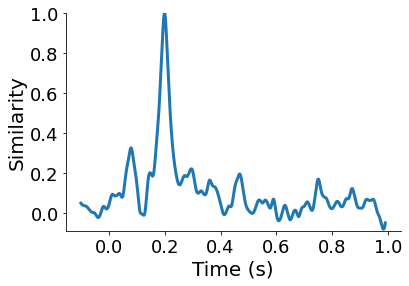

92
(92, 92)
(92, 92)
[0.46178379 0.76215487 0.67578163 ... 0.66628749 0.6135494  0.65421626]
[39.05876732 20.73578595 48.92498806 ... 57.07118968  2.03057812
 56.3784042 ]
92
(92, 92)
(92, 92)
[0.46178379 0.76215487 0.67578163 ... 0.66628749 0.6135494  0.65421626]
[0.70961774 0.54329056 0.81251065 ... 0.67630148 0.63111673 0.80332936]
92
(92, 92)
(92, 92)
[0.46178379 0.76215487 0.67578163 ... 0.66628749 0.6135494  0.65421626]
[0.90561503 0.65042561 0.83192035 ... 0.61822283 0.90000301 0.78989218]
92
(92, 92)
(92, 92)
[0.46178379 0.76215487 0.67578163 ... 0.66628749 0.6135494  0.65421626]
[0.81030459 0.67445666 0.72123016 ... 0.80866552 0.8209795  0.55738085]
92
(92, 92)
(92, 92)
[0.46178379 0.76215487 0.67578163 ... 0.66628749 0.6135494  0.65421626]
[0.81446658 0.785137   0.78581267 ... 0.62300547 0.6420632  0.6818477 ]
92
(92, 92)
(92, 92)
[0.46178379 0.76215487 0.67578163 ... 0.66628749 0.6135494  0.65421626]
[0.63817865 0.70662156 0.84850015 ... 0.52170128 0.74632094 0.81120293]
92


[0.46178379 0.76215487 0.67578163 ... 0.66628749 0.6135494  0.65421626]
[0.60588093 0.92372343 0.57079526 ... 0.9351432  0.85353719 1.20904103]
92
(92, 92)
(92, 92)
[0.46178379 0.76215487 0.67578163 ... 0.66628749 0.6135494  0.65421626]
[0.64812227 0.8703111  0.86880687 ... 0.9407995  0.77165221 0.93972471]
92
(92, 92)
(92, 92)
[0.46178379 0.76215487 0.67578163 ... 0.66628749 0.6135494  0.65421626]
[0.76691984 0.68051674 0.96413306 ... 1.09834906 0.94570339 0.75924006]
92
(92, 92)
(92, 92)
[0.46178379 0.76215487 0.67578163 ... 0.66628749 0.6135494  0.65421626]
[0.99808032 0.50740432 0.90912252 ... 0.94011329 0.94899289 0.99159103]
92
(92, 92)
(92, 92)
[0.46178379 0.76215487 0.67578163 ... 0.66628749 0.6135494  0.65421626]
[0.9244563  0.65514776 0.88867632 ... 0.6979196  0.8297579  0.96536163]
92
(92, 92)
(92, 92)
[0.46178379 0.76215487 0.67578163 ... 0.66628749 0.6135494  0.65421626]
[0.83090647 0.7774589  1.04295266 ... 0.57752358 0.83973056 1.05932215]
92
(92, 92)
(92, 92)
[0.4617837

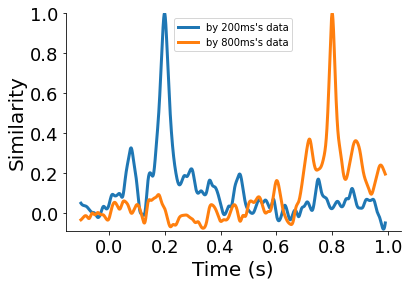

In [8]:
# Calculate the representational similarity between 200ms and all the time points
corrs1 = rdms_corr(rdm_sample1, rdms)

# Plot the corrs1
corrs1 = np.reshape(corrs1, [1, 110, 2])
plot_corrs_by_time(corrs1, time_unit=[-0.1, 0.01])

# Calculate and Plot multi-corrs
corrs2 = rdms_corr(rdm_sample2, rdms)
corrs = np.zeros([2, 110, 2])
corrs[0] = corrs1
corrs[1] = corrs2
labels = ["by 200ms's data", "by 800ms's data"]
plot_corrs_by_time(corrs, labels=labels, time_unit=[-0.1, 0.01])

## Section 8: Calculating the RDMs for each channels

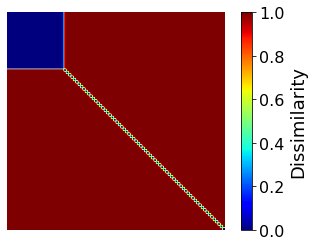

92
(92, 92)
(92, 92)
[0. 0. 0. ... 1. 1. 1.]
[0.49683777 1.1184412  0.97144704 ... 1.42398705 0.97060935 1.55098578]
92
(92, 92)
(92, 92)
[0. 0. 0. ... 1. 1. 1.]
[0.96926642 1.5403661  1.18139151 ... 1.77468376 0.41113892 1.5620736 ]
92
(92, 92)
(92, 92)
[0. 0. 0. ... 1. 1. 1.]
[1.83032736 0.75281821 0.93722241 ... 0.74797292 1.81079429 1.16056048]
92
(92, 92)
(92, 92)
[0. 0. 0. ... 1. 1. 1.]
[1.8484896  1.12442063 1.2958368  ... 0.72639422 1.38530799 0.59296081]
92
(92, 92)
(92, 92)
[0. 0. 0. ... 1. 1. 1.]
[0.65902093 1.18585382 0.64658563 ... 0.60829545 1.34547629 1.37087811]
92
(92, 92)
(92, 92)
[0. 0. 0. ... 1. 1. 1.]
[0.80714995 1.26064984 1.49694915 ... 1.57299453 1.39757068 0.78228794]
92
(92, 92)
(92, 92)
[0. 0. 0. ... 1. 1. 1.]
[0.95349899 0.25864536 1.28421278 ... 1.6403911  1.69725793 0.3678267 ]
92
(92, 92)
(92, 92)
[0. 0. 0. ... 1. 1. 1.]
[0.79746759 0.78932105 0.8665048  ... 1.5316666  0.98180469 1.51047268]
92
(92, 92)
(92, 92)
[0. 0. 0. ... 1. 1. 1.]
[0.25664108 1.46148

92
(92, 92)
(92, 92)
[0. 0. 0. ... 1. 1. 1.]
[1.63760037 1.52501536 1.64788839 ... 0.85414002 1.33682134 0.87400369]
92
(92, 92)
(92, 92)
[0. 0. 0. ... 1. 1. 1.]
[0.64047995 1.37198864 0.62607644 ... 0.33308128 0.92512897 0.8466986 ]
92
(92, 92)
(92, 92)
[0. 0. 0. ... 1. 1. 1.]
[1.17836029 1.5753487  1.24492676 ... 0.89185609 1.25606253 0.49394476]
92
(92, 92)
(92, 92)
[0. 0. 0. ... 1. 1. 1.]
[0.78442559 0.29176998 0.64551109 ... 0.99244349 1.35894033 1.32911772]
92
(92, 92)
(92, 92)
[0. 0. 0. ... 1. 1. 1.]
[0.50401409 0.70585821 1.4519585  ... 1.24384553 0.35993853 1.69352128]
92
(92, 92)
(92, 92)
[0. 0. 0. ... 1. 1. 1.]
[0.79038147 1.11816503 0.44197149 ... 1.55032712 0.64186226 1.67886091]
92
(92, 92)
(92, 92)
[0. 0. 0. ... 1. 1. 1.]
[0.90725009 0.53748059 1.54470212 ... 1.10903193 0.69811509 1.00322313]
92
(92, 92)
(92, 92)
[0. 0. 0. ... 1. 1. 1.]
[1.35163073 0.88579103 1.08703992 ... 1.43338075 1.00044019 1.19920443]
92
(92, 92)
(92, 92)
[0. 0. 0. ... 1. 1. 1.]
[1.27117061 1.35137

[0. 0. 0. ... 1. 1. 1.]
[1.09632755 0.22183951 0.82355392 ... 0.36889344 1.20791932 0.86908476]
92
(92, 92)
(92, 92)
[0. 0. 0. ... 1. 1. 1.]
[1.14716444 0.91043383 0.21051967 ... 1.66062028 0.90440649 1.38013652]
92
(92, 92)
(92, 92)
[0. 0. 0. ... 1. 1. 1.]
[1.39552265 0.8537171  1.59384939 ... 1.17882819 0.11463691 1.24866716]
92
(92, 92)
(92, 92)
[0. 0. 0. ... 1. 1. 1.]
[0.36589342 0.98394138 1.0137384  ... 0.57708944 0.90593588 0.53926858]
92
(92, 92)
(92, 92)
[0. 0. 0. ... 1. 1. 1.]
[1.54501188 1.3807827  0.90966643 ... 1.24735398 0.49341035 1.1759301 ]
92
(92, 92)
(92, 92)
[0. 0. 0. ... 1. 1. 1.]
[0.6438621  1.35063117 1.83512043 ... 1.18964588 0.82651896 0.82566537]
92
(92, 92)
(92, 92)
[0. 0. 0. ... 1. 1. 1.]
[0.38512132 0.98622777 1.02435252 ... 1.27600959 0.88674546 1.21167539]
92
(92, 92)
(92, 92)
[0. 0. 0. ... 1. 1. 1.]
[1.520484   1.02605001 1.64978087 ... 1.34348088 0.89032802 1.87767275]
92
(92, 92)
(92, 92)
[0. 0. 0. ... 1. 1. 1.]
[1.28812398 0.58575361 1.22048779 ... 1.

[0. 0. 0. ... 1. 1. 1.]
[0.43277572 0.72332472 1.26069276 ... 0.84985946 0.89898881 1.30618743]
92
(92, 92)
(92, 92)
[0. 0. 0. ... 1. 1. 1.]
[1.01392095 1.62722395 0.82510979 ... 0.95143855 0.90671393 0.94818169]
92
(92, 92)
(92, 92)
[0. 0. 0. ... 1. 1. 1.]
[1.2425888  0.64588094 0.55052434 ... 0.77257512 0.66235526 0.22171353]
92
(92, 92)
(92, 92)
[0. 0. 0. ... 1. 1. 1.]
[0.6551533  1.59413304 0.95717019 ... 0.4788944  0.91958664 0.74922397]
92
(92, 92)
(92, 92)
[0. 0. 0. ... 1. 1. 1.]
[1.52730877 0.48731846 1.45683761 ... 0.74373348 1.43344807 1.8163808 ]
92
(92, 92)
(92, 92)
[0. 0. 0. ... 1. 1. 1.]
[1.14025546 0.8792445  0.9112384  ... 1.05885074 0.87765061 0.54088052]
92
(92, 92)
(92, 92)
[0. 0. 0. ... 1. 1. 1.]
[0.15651077 0.35546496 0.92054329 ... 1.32555323 1.21796062 0.5648661 ]
92
(92, 92)
(92, 92)
[0. 0. 0. ... 1. 1. 1.]
[0.79424273 0.81156971 0.93248231 ... 1.76352357 0.85225597 0.78374059]
92
(92, 92)
(92, 92)
[0. 0. 0. ... 1. 1. 1.]
[1.19107606 1.188694   1.78094316 ... 0.

[0. 0. 0. ... 1. 1. 1.]
[0.97779488 0.80431192 0.56727036 ... 0.53835402 1.29749765 1.52992687]
92
(92, 92)
(92, 92)
[0. 0. 0. ... 1. 1. 1.]
[1.50489005 0.67954296 0.95910912 ... 1.57596583 0.83227385 1.11934249]
92
(92, 92)
(92, 92)
[0. 0. 0. ... 1. 1. 1.]
[0.89655835 0.7452491  1.75936541 ... 0.80263579 1.30098137 0.48869078]
92
(92, 92)
(92, 92)
[0. 0. 0. ... 1. 1. 1.]
[0.48428078 0.37239893 1.20374087 ... 1.01363562 1.61589289 0.69628638]
92
(92, 92)
(92, 92)
[0. 0. 0. ... 1. 1. 1.]
[0.85102222 0.93822802 1.27757898 ... 1.08720056 0.6537115  1.53692123]
92
(92, 92)
(92, 92)
[0. 0. 0. ... 1. 1. 1.]
[0.57993956 0.98003851 0.89885999 ... 0.46485053 1.36977647 0.81779363]
92
(92, 92)
(92, 92)
[0. 0. 0. ... 1. 1. 1.]
[1.62553521 0.97616738 1.19372347 ... 0.04981602 0.98005663 0.80335251]
92
(92, 92)
(92, 92)
[0. 0. 0. ... 1. 1. 1.]
[0.50333126 0.35707032 1.60540955 ... 0.67373751 0.85013474 1.65748168]
92
(92, 92)
(92, 92)
[0. 0. 0. ... 1. 1. 1.]
[0.85053845 1.25004636 0.75177979 ... 0.

[0. 0. 0. ... 1. 1. 1.]
[0.5492617  0.37304249 1.52779204 ... 1.49991249 1.15606376 0.81265225]
92
(92, 92)
(92, 92)
[0. 0. 0. ... 1. 1. 1.]
[0.9241216  0.3652786  0.95239417 ... 1.74742532 1.35659487 0.39943811]
92
(92, 92)
(92, 92)
[0. 0. 0. ... 1. 1. 1.]
[1.44294354 0.51068959 1.09994082 ... 0.45440495 0.97650562 1.19947586]
92
(92, 92)
(92, 92)
[0. 0. 0. ... 1. 1. 1.]
[0.9611919  1.19165598 0.9316176  ... 0.72027288 1.72740258 1.39316572]
92
(92, 92)
(92, 92)
[0. 0. 0. ... 1. 1. 1.]
[1.13025417 1.00476917 1.35076757 ... 0.68788872 0.73648885 1.28378962]
92
(92, 92)
(92, 92)
[0. 0. 0. ... 1. 1. 1.]
[0.13537189 1.06010702 1.01890593 ... 0.74603883 1.28024812 1.24357902]
92
(92, 92)
(92, 92)
[0. 0. 0. ... 1. 1. 1.]
[0.74348325 1.70375686 0.60666919 ... 1.40225983 1.3987482  0.24913707]
92
(92, 92)
(92, 92)
[0. 0. 0. ... 1. 1. 1.]
[0.99958269 1.7200002  0.65639474 ... 1.659954   1.57629948 0.57126662]
92
(92, 92)
(92, 92)
[0. 0. 0. ... 1. 1. 1.]
[1.17184926 0.61165954 0.82362911 ... 0.

92
(92, 92)
(92, 92)
[0. 0. 0. ... 1. 1. 1.]
[0.33222789 0.95289509 1.65159512 ... 1.50044802 0.89814196 0.73085873]
92
(92, 92)
(92, 92)
[0. 0. 0. ... 1. 1. 1.]
[0.93627931 0.82942703 1.23986943 ... 1.71716707 0.85948145 0.70168285]
92
(92, 92)
(92, 92)
[0. 0. 0. ... 1. 1. 1.]
[1.26304645 0.98628922 0.76574044 ... 1.44816955 1.69640182 0.57899544]
92
(92, 92)
(92, 92)
[0. 0. 0. ... 1. 1. 1.]
[1.43177321 0.52054088 0.7438601  ... 0.78435731 1.42196334 1.72677249]
92
(92, 92)
(92, 92)
[0. 0. 0. ... 1. 1. 1.]
[1.47267443 0.69071455 0.84392753 ... 0.12816437 1.12137484 1.3595494 ]
92
(92, 92)
(92, 92)
[0. 0. 0. ... 1. 1. 1.]
[1.05078549 0.94657779 1.05565807 ... 1.30844864 1.20358974 0.59626777]
92
(92, 92)
(92, 92)
[0. 0. 0. ... 1. 1. 1.]
[1.54912994 0.83755588 1.14119796 ... 1.39322687 1.31037493 0.52793313]
92
(92, 92)
(92, 92)
[0. 0. 0. ... 1. 1. 1.]
[0.6237952  0.22730504 1.80247871 ... 0.29410097 1.33802148 1.10014518]
92
(92, 92)
(92, 92)
[0. 0. 0. ... 1. 1. 1.]
[0.67171223 1.50305

92
(92, 92)
(92, 92)
[0. 0. 0. ... 1. 1. 1.]
[0.95550301 0.95945665 1.2407617  ... 1.00547652 1.78875045 1.38865312]
92
(92, 92)
(92, 92)
[0. 0. 0. ... 1. 1. 1.]
[1.42584077 1.4124002  0.2254467  ... 0.37875658 1.21186756 1.64524198]
92
(92, 92)
(92, 92)
[0. 0. 0. ... 1. 1. 1.]
[0.86242592 1.42483333 1.15768765 ... 0.31718066 1.66113546 1.23494586]
92
(92, 92)
(92, 92)
[0. 0. 0. ... 1. 1. 1.]
[1.81169743 0.33039813 0.79406525 ... 1.61679653 1.18858913 1.29931887]
92
(92, 92)
(92, 92)
[0. 0. 0. ... 1. 1. 1.]
[0.58476386 0.93273165 0.93249463 ... 0.38886242 1.23059762 1.08220556]
92
(92, 92)
(92, 92)
[0. 0. 0. ... 1. 1. 1.]
[0.27030308 1.60536552 0.81406974 ... 1.2038661  0.82831908 0.36426872]
92
(92, 92)
(92, 92)
[0. 0. 0. ... 1. 1. 1.]
[0.97281961 0.47533048 0.34389769 ... 0.79699451 1.32846628 1.6620379 ]
92
(92, 92)
(92, 92)
[0. 0. 0. ... 1. 1. 1.]
[1.61378783 1.34292379 0.86981629 ... 0.360772   1.36837954 1.45246391]
92
(92, 92)
(92, 92)
[0. 0. 0. ... 1. 1. 1.]
[0.37812864 0.90339

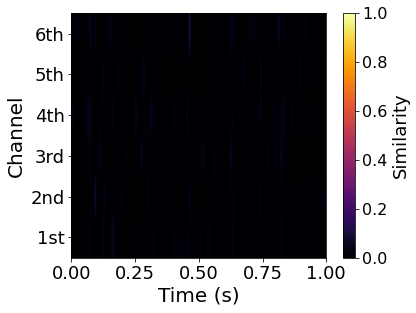

0 0.01 1.0
(6, 5000)


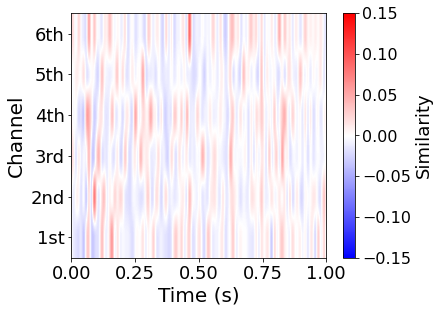

In [9]:
# Calculate the RDMs for the first six channels by a 10ms time-window between 0ms and 1000ms
rdms_chls = eegRDM(megdata[:, :, :, :6, 100:1100], chl_opt=1, time_opt=1, time_win=10, time_step=10)

# Create a 'human-related' coding model RDM
model_rdm = np.ones([92, 92])
for i in range(92):
    for j in range(92):
        if (i < 24) and (j < 24):
            model_rdm[i, j] = 0
    model_rdm[i, i] = 0

# Plot this coding model RDM
plot_rdm(model_rdm)

# Calculate the representational similarity between the neural activities and the coding model for each channel
corrs_chls = rdms_corr(model_rdm, rdms_chls)

# Plot the representational similarity results
plot_corrs_hotmap(corrs_chls, time_unit=[0, 0.01])

# Set more parameters and re-plot
plot_corrs_hotmap(corrs_chls, time_unit=[0, 0.01], lim=[-0.15, 0.15], smooth=True, cmap='bwr')